In [1]:
from langgraph.graph import START, END, StateGraph
from langchain_groq import ChatGroq
from typing import TypedDict
from IPython.display import Image, Markdown
from dotenv import load_dotenv

_ = load_dotenv()

In [2]:
class BatsmanState(TypedDict):
    runs: int
    balls: int
    fours: int
    sixes: int
    
    strike_rate: float
    boundary_rate: float
    ball_per_boundary: float
    
    summary: str

In [3]:
def calculate_strike_rate(state: BatsmanState) -> BatsmanState:
    strike_rate = (state["runs"] / state["balls"]) * 100
    return { "strike_rate": strike_rate }

def calculate_boundary_rate(state: BatsmanState) -> BatsmanState:
    boundary_rate = (((state['fours']*4) + (state['sixes']*6))/(state['runs']))*100
    return { "boundary_rate" : boundary_rate }

def calculate_bpb(state: BatsmanState) -> BatsmanState:
    ball_per_boundary = state['balls']/(state['fours']+state['sixes'])
    return { "ball_per_boundary": ball_per_boundary }

def summary(state: BatsmanState) -> BatsmanState:
    summary = f"""
        Strike Rate: {state['strike_rate']}
        Boundary Rate: {state['boundary_rate']}
        Ball per Boundary: {state['ball_per_boundary']}
    """
    return { "summary": summary }

In [4]:
#  state graph
graph = StateGraph(BatsmanState)

# add nodes
graph.add_node("calculate_strike_rate", calculate_strike_rate)
graph.add_node("calculate_boundary_rate", calculate_boundary_rate)
graph.add_node("calculate_bpb", calculate_bpb)
graph.add_node("calculate_summary", summary)


# add edges
graph.add_edge(START, "calculate_strike_rate")
graph.add_edge(START, "calculate_boundary_rate")
graph.add_edge(START, "calculate_bpb")

graph.add_edge("calculate_strike_rate", "calculate_summary")
graph.add_edge("calculate_boundary_rate", "calculate_summary")
graph.add_edge("calculate_bpb", "calculate_summary")

graph.add_edge("calculate_summary", END)

workflow = graph.compile()

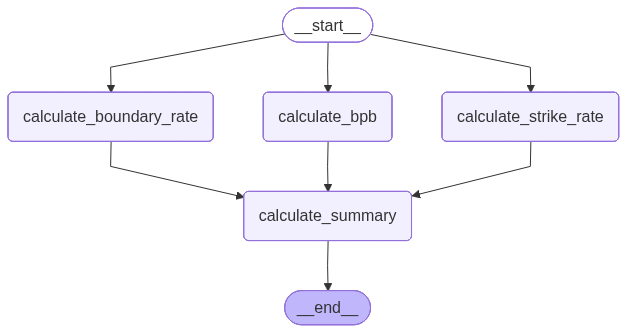

In [5]:
Image(workflow.get_graph().draw_mermaid_png())

In [6]:
initial_state = {"runs": 40, "balls": 10, "fours": 8, "sixes": 1}
final_state = workflow.invoke(initial_state)
print(f"""
      - Runs: {final_state['runs']}
      - Balls: {final_state['balls']}
      - Fours: {final_state['fours']}
      - Sixes: {final_state['sixes']}
      """)
print(final_state['summary'])


      - Runs: 40
      - Balls: 10
      - Fours: 8
      - Sixes: 1
      

        Strike Rate: 400.0
        Boundary Rate: 95.0
        Ball per Boundary: 1.1111111111111112
    
